In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [26]:
import yfinance as yf
import pandas as pd

In [27]:
# Download data (Apple stock from 2018–2024)
data = yf.download("AAPL", start="2018-01-01", end="2024-12-31", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [28]:
# Save to CSV with index labeled as "Date"
data.to_csv("AAPL_stock_data.csv", index_label="Date")

In [29]:
print("Saved with Date column.")

Saved with Date column.


In [30]:
# Show first few rows
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.426819  40.436208  39.722764  39.933983  102223600
2018-01-03  40.419788  40.964259  40.356426  40.490195  118071600
2018-01-04  40.607533  40.710794  40.384583  40.492536   89738400
2018-01-05  41.069855  41.156687  40.612220  40.703747   94640000
2018-01-08  40.917316  41.213018  40.818746  40.917316   82271200


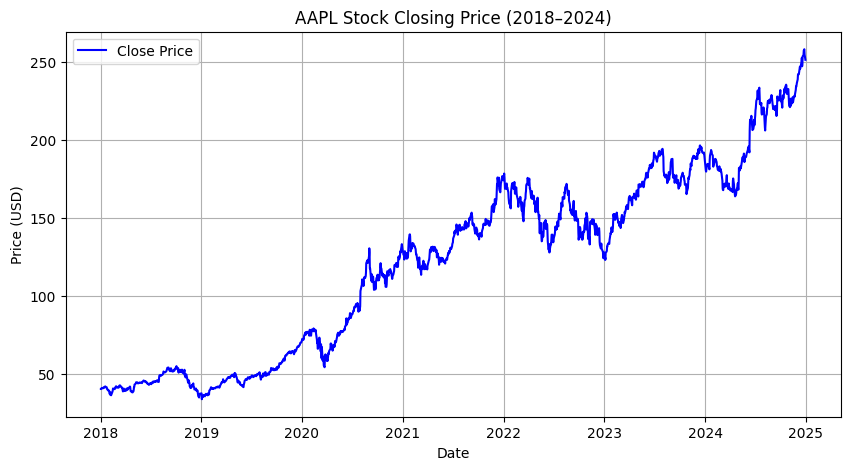

In [32]:
# Plot closing price
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title("AAPL Stock Closing Price (2018–2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

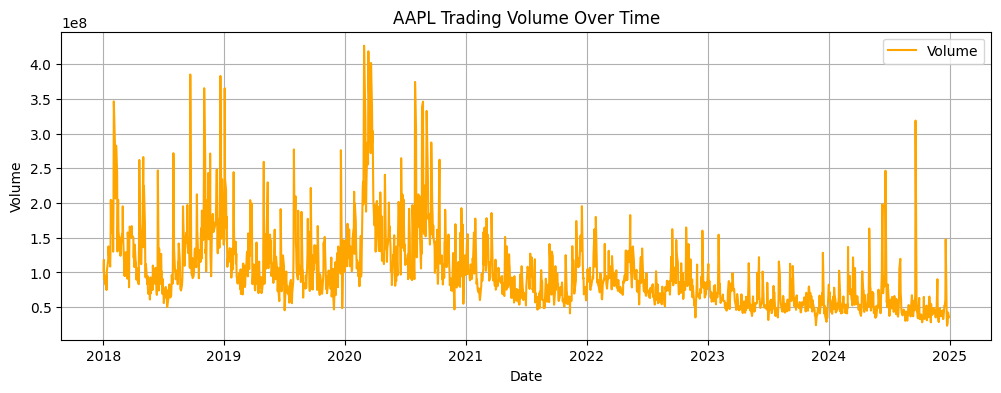

In [44]:
# 2️⃣ Plot the trading volume
plt.figure(figsize=(12, 4))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title("AAPL Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
import pandas as pd

In [42]:
import pandas as pd

# Skip first 2 junk rows and load real data
df = pd.read_csv("AAPL_stock_data.csv", skiprows=2)

# Parse 'Price' column as Date and set it as index
df.rename(columns={'Price': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Final check
print(df.head())



            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
Date                                                                  
2018-01-02   40.426819   40.436208   39.722764   39.933983   102223600
2018-01-03   40.419788   40.964259   40.356426   40.490195   118071600
2018-01-04   40.607533   40.710794   40.384583   40.492536    89738400
2018-01-05   41.069855   41.156687   40.612220   40.703747    94640000
2018-01-08   40.917316   41.213018   40.818746   40.917316    82271200


In [43]:
# Rename columns to meaningful names
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Final check
print(df.head())


                Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.426819  40.436208  39.722764  39.933983  102223600
2018-01-03  40.419788  40.964259  40.356426  40.490195  118071600
2018-01-04  40.607533  40.710794  40.384583  40.492536   89738400
2018-01-05  41.069855  41.156687  40.612220  40.703747   94640000
2018-01-08  40.917316  41.213018  40.818746  40.917316   82271200


In [45]:
# 3️⃣ Add Moving Averages: 50-day and 200-day
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

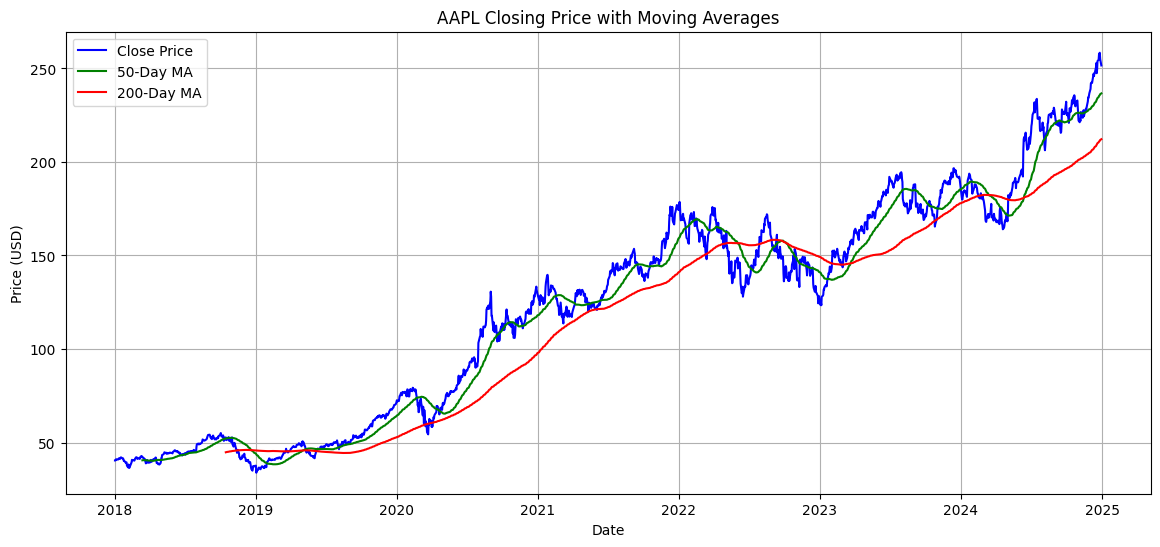

In [46]:
# 📈 Plot with moving averages
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA_50'], label='50-Day MA', color='green')
plt.plot(df['MA_200'], label='200-Day MA', color='red')
plt.title("AAPL Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_check = pd.read_csv("AAPL_stock_data.csv")
print(df_check.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [5]:
import pandas as pd

# Skip the first two bad rows
df = pd.read_csv("AAPL_stock_data.csv", skiprows=2)

# Rename the first column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Show result
print(df.head())


            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
Date                                                                  
2018-01-02   40.426819   40.436208   39.722764   39.933983   102223600
2018-01-03   40.419788   40.964259   40.356426   40.490195   118071600
2018-01-04   40.607533   40.710794   40.384583   40.492536    89738400
2018-01-05   41.069855   41.156687   40.612220   40.703747    94640000
2018-01-08   40.917316   41.213018   40.818746   40.917316    82271200


In [6]:
df.to_csv("AAPL_stock_data_cleaned.csv")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [11]:
df = pd.read_csv("AAPL_stock_data_cleaned.csv", parse_dates=['Date'], index_col='Date')
print(df.columns)


Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')


In [12]:
# Rename the columns properly
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']


In [13]:
data = df['Close']


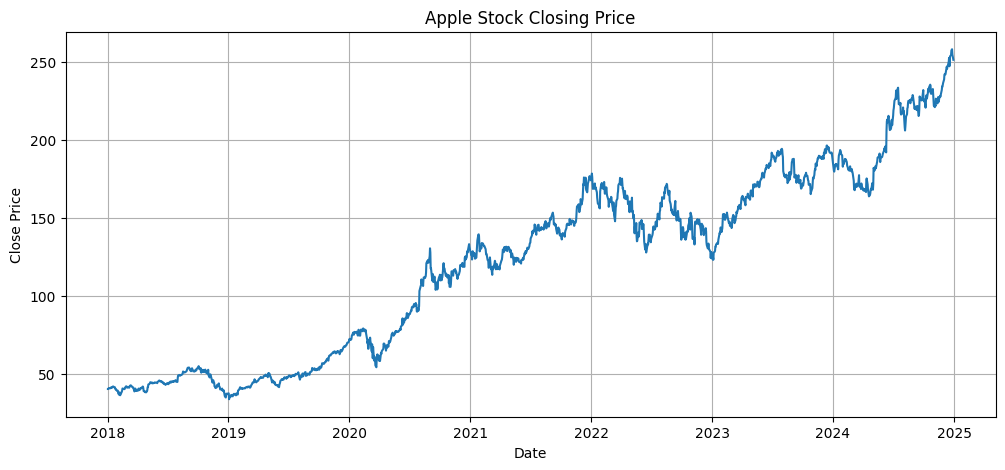

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(data)
plt.title('Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [15]:
# Split data into train and test
train = data[:-100]
test = data[-100:]

In [16]:
# Fit SARIMAX (ARIMA) model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)

In [17]:
# Forecast
forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [18]:
# Evaluate
mse = mean_squared_error(test, forecast)
print(f'ARIMA Test MSE: {mse:.2f}')


ARIMA Test MSE: 574.46


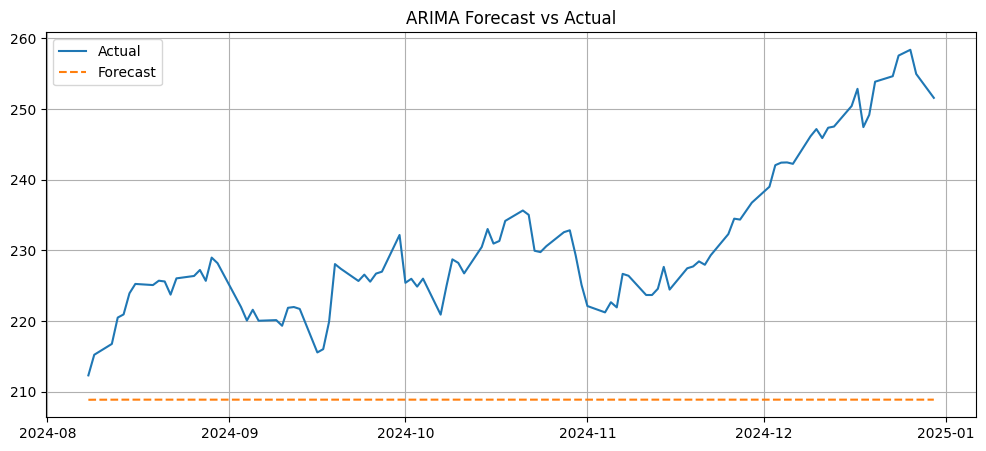

In [19]:
# Plot actual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from prophet import Prophet

In [21]:

# Prepare data for Prophet
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

# Fit model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dates
future = prophet_model.make_future_dataframe(periods=100)
forecast = prophet_model.predict(future)

19:55:26 - cmdstanpy - INFO - Chain [1] start processing
19:55:27 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Prepare data
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

# Fit model
model = Prophet()
model.fit(df_prophet)

19:58:14 - cmdstanpy - INFO - Chain [1] start processing
19:58:19 - cmdstanpy - INFO - Chain [1] done processing


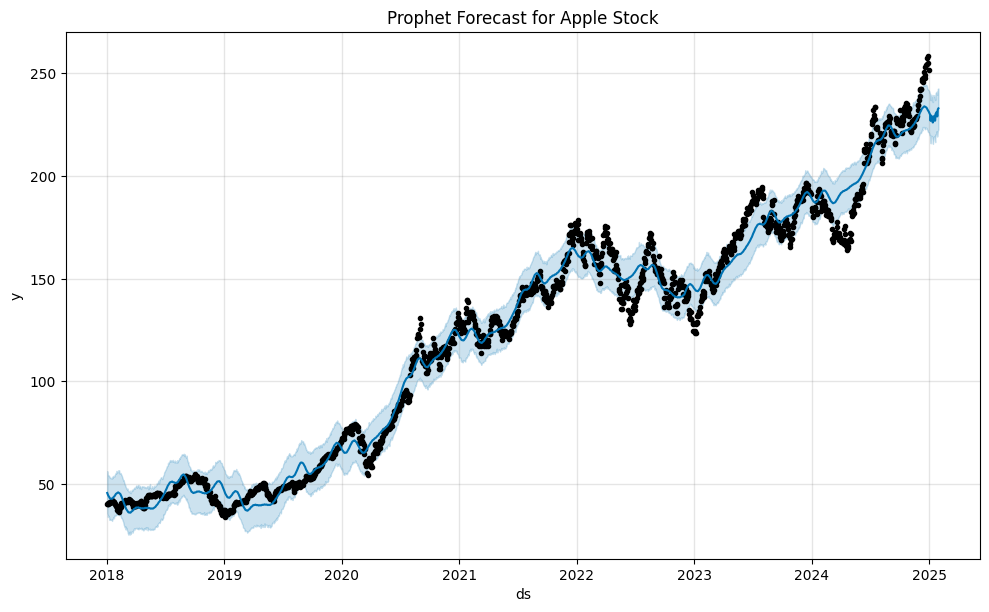

In [26]:
# Create future dates for prediction
future = model.make_future_dataframe(periods=30)  # 30 days ahead

# Forecast
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Prophet Forecast for Apple Stock")
plt.show()


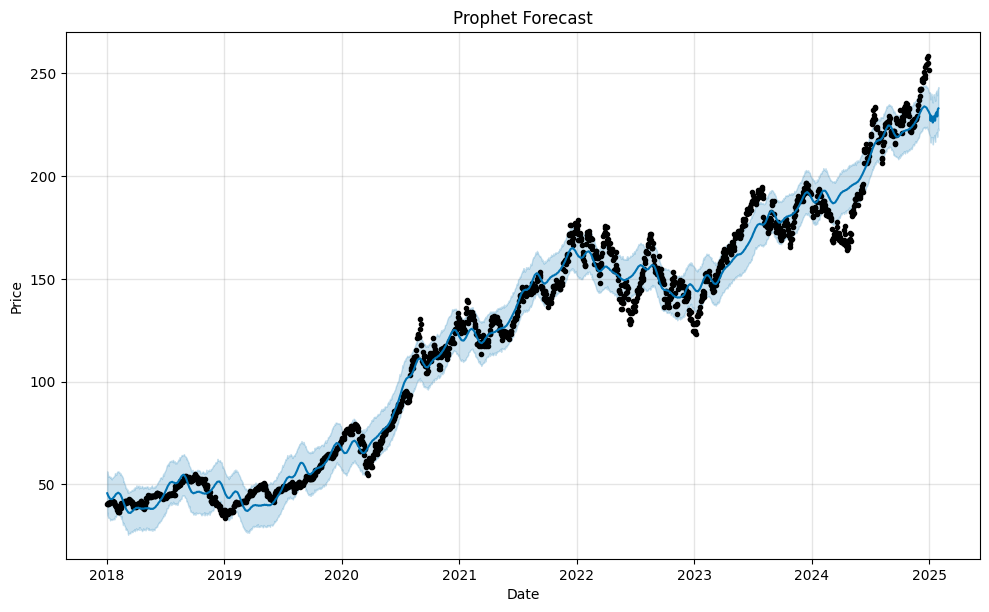

In [34]:
# Recreate the Prophet forecast
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)

# Plot forecast with Prophet
prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming df['Close'] is your time series
train = df['Close'][:-30]
test = df['Close'][-30:]

# Fit ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
arima_forecast = model_fit.forecast(steps=30)

# MSE
mse_arima = mean_squared_error(test, arima_forecast)
print(f"ARIMA Test MSE: {mse_arima:.2f}")


ARIMA Test MSE: 326.88


In [36]:
# Prophet prediction values
prophet_pred = forecast.set_index('ds')['yhat'][-30:].values
actual = df['Close'][-30:].values

# Compare ARIMA vs Prophet
from sklearn.metrics import mean_squared_error

arima_mse = mean_squared_error(actual, arima_forecast)
prophet_mse = mean_squared_error(actual, prophet_pred)

print(f"ARIMA MSE: {arima_mse:.2f}")
print(f"Prophet MSE: {prophet_mse:.2f}")


ARIMA MSE: 326.88
Prophet MSE: 265.58


In [37]:
# Creating Summary Table
import pandas as pd

summary = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet'],
    'MSE': [326.88, 265.58]
})
print(summary)


     Model     MSE
0    ARIMA  326.88
1  Prophet  265.58


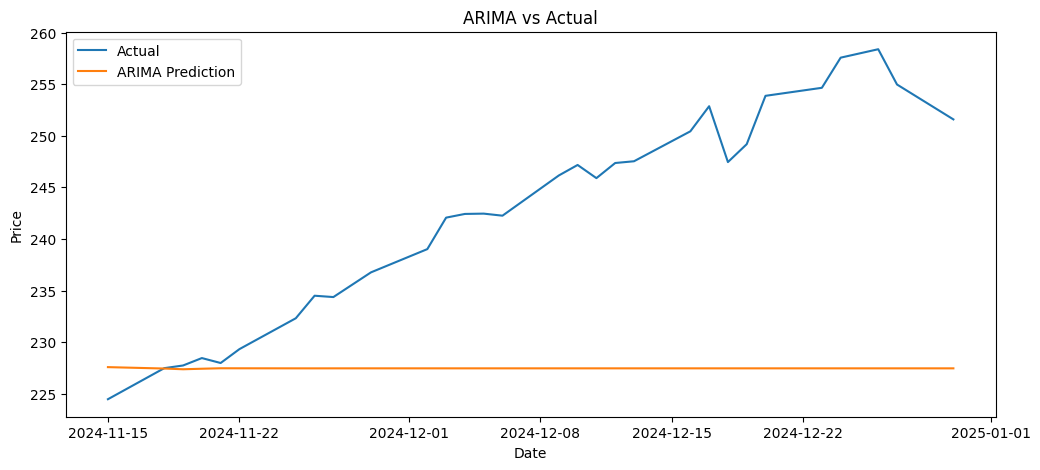

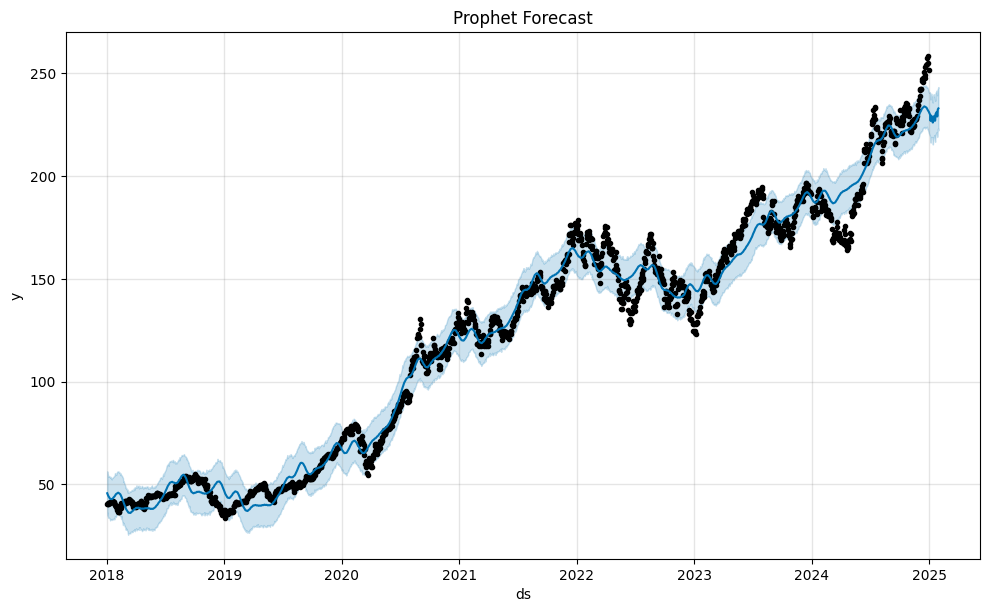

In [38]:
#Visualizing Forecast vs Actual
import matplotlib.pyplot as plt

# ARIMA plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Prediction')
plt.title('ARIMA vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prophet plot (if not done already)
prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.show()


In [ ]:
## 5. LSTM Forecasting (Using TensorFlow)
